# Linear Models in Classification

## Introduction

In this lab, we're going to look at linear models in classification. In lecture, we considered three methods of fitting linear decision boundaries: fit by __regression__, fit by __estimating labels by a Gaussian distributions__, and fit by __logistic regression__. 

We will start by testing out our models for binary classification on the UW Breast Cancer data set. This dataset contains a series of measurements derived from pictures of cells and attempts to classify them as cancerous or not, based on their numerical characteristics. 

<table>
    <tr><td>
        <img src="http://ftp.cs.wisc.edu/math-prog/cpo-dataset/machine-learn/cancer/cancer_images/92_7241.gif" width=300px>
        </td><td width=200px>
            $$\Rightarrow \{\text{Malignant, Benign}\}$$
        </td>
    </tr>
</table>

We will then apply multilabel classification techniques to the MNIST handwriting dataset. The MNIST dataset contains pictures of hand written digits, and attempts to classify them. In MNIST, the feature space is high dimensional while the label space is relatively low, and will serve as a bench mark for many of our later machine learning techniques. 



<table>
    <tr><td>
        <img src="https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png" width=300px>
        </td>
        </td><td width=20px>
            $$\Rightarrow$$
        </td>
        <td width=40px>
        <table><tr><td>0</td></tr><tr><td>1</td></tr><tr><td>2</td></tr><tr><td>3</td></tr>
        <tr><td>4</td></tr><tr><td>5</td></tr><tr><td>6</td></tr><tr><td>7</td></tr><tr><td>8</td></tr>
            <tr><td>9</td></tr>
        </table>
        </td>
    </tr>
</table>

## Binary Classification

Cancer cells grow more chaotically than their benign counterparts. Their growth tends to be unstable, nonlinear and  ruptured. (See http://sphweb.bumc.bu.edu/otlt/MPH-Modules/PH/PH709_Cancer/PH709_Cancer7.html)
<img src="http://sphweb.bumc.bu.edu/otlt/MPH-Modules/PH/PH709_Cancer/Characteristics%20of%20Cancer%20Cells.png" width=400px>
The UW Breast Cancer Dataset (https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original)) contains hand measured characteristics of cells as a training set and their diagnosis as _benign_ or _malignant_. 

<table><tr><td>
    <img src = "http://ftp.cs.wisc.edu/math-prog/cpo-dataset/machine-learn/cancer/cancer_images/91_5691.gif" width = 300>
    </td><td>
    <img src = "http://ftp.cs.wisc.edu/math-prog/cpo-dataset/machine-learn/cancer/cancer_images/92_7241.gif" width = 300>
    </td>
</tr></table>

The data set contains

<div class="alert alert-block alert-info">
Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.<br><br>

Number of instances: 569 <br><br>

Number of attributes: 32 (ID, diagnosis, 30 real-valued input features)<br><br>

Attribute Information:<br><br>

1) ID number<br>
2) Diagnosis (M = malignant, B = benign)<br>


3-32) Ten real-valued features are computed for each cell nucleus:<br><br>

a) radius (mean of distances from center to points on the perimeter)<br>
b) texture (standard deviation of gray-scale values)<br>
c) perimeter<br>
d) area<br>
e) smoothness (local variation in radius lengths)<br>
f) compactness (perimeter^2 / area - 1.0)<br>
g) concavity (severity of concave portions of the contour)<br>
h) concave points (number of concave portions of the contour)<br>
i) symmetry<br>
j) fractal dimension ("coastline approximation" - 1)<br><br>

https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.names
</div>

It doesn't say this very well in the documentation, but the first set of 10 features numbers in each row is the __mean__ property for all the cells in the image. The second set of 10 features is the __standard error__ and the third is the "__worst__", or most extreme. 

We start by downloading the data and the names of the columns. Note that the datafile itself is just a list of number, so we need to download the names file separately and merge the dataframes.

For an excellent kernel on data visualization for the UWBCD, take a look here: https://www.kaggle.com/kanncaa1/feature-selection-and-data-visualization. 

See also Seaborn's documentation on plotting categorical data: https://seaborn.pydata.org/tutorial/categorical.html

In [11]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data')
names = ["id","diagnosis","radius_mean","texture_mean","perimeter_mean","area_mean",
         "smoothness_mean","compactness_mean","concavity_mean","concave_points_mean",
         "symmetry_mean","fractal_dimension_mean","radius_se","texture_se","perimeter_se",
         "area_se","smoothness_se","compactness_se","concavity_se","concave" "points_se",
         "symmetry_se","fractal_dimension_se","radius_worst","texture_worst",
         "perimeter_worst","area_worst","smoothness_worst","compactness_worst",
         "concavity_worst","concave_points_worst","symmetry_worst","fractal_dimension_worst"]

data.columns=names
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


## Exploratory analysis for Categorical Targets

Lets start with an exploratory analysis. First, we see that __diagnosis__ is our target variable and __id__ should be dropped. Let generate a few questions for our exploratory analysis:

* What does the data look like for each feature?
* What is the proportion of __malignant__ to __benign__ samples?
* What does the correlation matrix look like for mean, standard error and worst?
* Can we visualize the data in a useful way, as violin plots, box plots or swarm plots? As scatter plots?

To start, lets use the DataFrame classes built in `DataFrame.describe()` function:

* `DataFrame.describe()` returns the __count__, __mean__, __std__, __min__, __max__ and __quantiles__ for all columns of the dataframe. [Doc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)

In [45]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.680000e+02,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,...,568.00000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000
mean,3.042382e+07,14.120491,19.305335,91.914754,654.279754,0.096321,0.104036,0.088427,0.048746,0.181055,...,16.25315,25.691919,107.125053,878.578873,0.132316,0.253541,0.271414,0.114341,0.289776,0.083884
std,1.251246e+08,3.523416,4.288506,24.285848,351.923751,0.014046,0.052355,0.079294,0.038617,0.027319,...,4.82232,6.141662,33.474687,567.846267,0.022818,0.156523,0.207989,0.065484,0.061508,0.018017
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.93000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692225e+05,11.697500,16.177500,75.135000,420.175000,0.086290,0.064815,0.029540,0.020310,0.161900,...,13.01000,21.095000,84.102500,514.975000,0.116600,0.146900,0.114475,0.064730,0.250350,0.071412
50%,9.061570e+05,13.355000,18.855000,86.210000,548.750000,0.095865,0.092525,0.061400,0.033455,0.179200,...,14.96500,25.425000,97.655000,685.550000,0.131300,0.211850,0.226550,0.099840,0.282050,0.080015
75%,8.825022e+06,15.780000,21.802500,103.875000,782.625000,0.105300,0.130400,0.129650,0.073730,0.195625,...,18.76750,29.757500,125.175000,1073.500000,0.146000,0.337600,0.381400,0.161325,0.317675,0.092065
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.04000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Let's split off diagnosis, and normalize the data into units of standard deviation from the mean. Recall that data frame objects have the following:


* `DataFrame.count` Count number of non-NA/null observations.
* `DataFrame.max` Maximum of the values in the object.
* `DataFrame.min` Minimum of the values in the object.
* `DataFrame.mean` Mean of the values.
* `DataFrame.std` Standard deviation of the obersvations.
* `DataFrame.select_dtypes` Subset of a DataFrame including/excluding columns based on their dtype. 
* `DataFrame.drop(columns=[])` Drop a list of columns. 

In [46]:
## Drop Feature Columns X
X = data.drop(columns=["id","diagnosis"])

## Set Up Target Variables y
y = data["diagnosis"]

## Normalize feature data by centering on the mean and dividing by std
X = (X - X.mean())/X.std()

X.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.680000e+02,5.680000e+02,5.680000e+02,5.680000e+02,5.680000e+02,5.680000e+02,5.680000e+02,5.680000e+02,5.680000e+02,5.680000e+02,...,5.680000e+02,5.680000e+02,5.680000e+02,5.680000e+02,5.680000e+02,5.680000e+02,5.680000e+02,5.680000e+02,5.680000e+02,5.680000e+02
mean,-3.284931e-15,-5.873236e-15,-9.851275e-16,-8.764507e-16,5.504986e-15,-9.045972e-16,-1.606696e-16,1.105532e-15,-3.459478e-15,1.292002e-15,...,-1.272456e-15,1.515024e-15,-1.556267e-15,6.876346e-16,-4.399063e-15,-1.817013e-15,9.389985e-16,-3.705956e-16,-3.281034e-15,2.123888e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.026298e+00,-2.237454e+00,-1.981597e+00,-1.451393e+00,-3.110598e+00,-1.616953e+00,-1.115180e+00,-1.262296e+00,-2.747311e+00,-1.820874e+00,...,-1.725964e+00,-2.226095e+00,-1.694267e+00,-1.221068e+00,-2.679715e+00,-1.445479e+00,-1.304948e+00,-1.746080e+00,-2.166804e+00,-1.600914e+00
25%,-6.876824e-01,-7.293529e-01,-6.909272e-01,-6.652144e-01,-7.141872e-01,-7.491314e-01,-7.426431e-01,-7.363640e-01,-7.011471e-01,-7.209942e-01,...,-6.725289e-01,-7.484813e-01,-6.877601e-01,-6.403210e-01,-6.887539e-01,-6.813105e-01,-7.545575e-01,-7.575981e-01,-6.409914e-01,-6.922081e-01
50%,-2.172582e-01,-1.050096e-01,-2.349003e-01,-2.998654e-01,-3.249883e-02,-2.198625e-01,-3.408484e-01,-3.959714e-01,-6.789785e-02,-1.783397e-01,...,-2.671224e-01,-4.346039e-02,-2.829019e-01,-3.399316e-01,-4.452924e-02,-2.663559e-01,-2.157058e-01,-2.214386e-01,-1.256130e-01,-2.147525e-01
75%,4.709943e-01,5.822926e-01,4.924780e-01,3.646962e-01,6.392223e-01,5.035609e-01,5.198701e-01,6.469586e-01,5.333229e-01,4.762574e-01,...,5.213985e-01,6.619676e-01,5.392118e-01,3.432639e-01,5.996954e-01,5.370396e-01,5.288062e-01,7.174895e-01,4.535780e-01,4.540461e-01
max,3.970439e+00,4.657721e+00,3.977018e+00,5.247501e+00,4.775629e+00,4.610123e+00,4.267306e+00,3.947822e+00,4.500282e+00,4.928370e+00,...,4.103181e+00,3.883002e+00,4.303997e+00,5.944252e+00,3.956675e+00,5.139554e+00,4.714613e+00,2.697737e+00,6.080876e+00,6.860915e+00


#### Proportion of Malignant to Benign

The proportion of malignant labels to benign labels can be computed using `DataFrame.value_counts()` and displayed using seaborns `sns.countplot()` [Doc](https://seaborn.pydata.org/generated/seaborn.countplot.html).

B    357
M    211
Name: diagnosis, dtype: int64

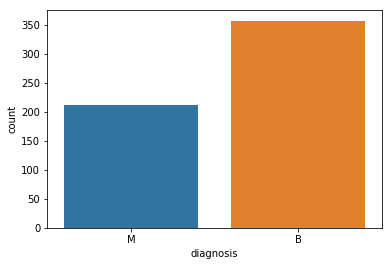

In [47]:
display(y.value_counts())
sns.countplot(y)

In [213]:
B,M = y.value_counts()
print("Roughly ",M/(M+B),"malignant to",B/(M+B),"benign")

Roughly  0.3714788732394366 malignant to 0.6285211267605634 benign


#### Correlation Matrix

Dataframes have a built in correlation matrix function, `DataFrame.corr()` and we can use seaborn to plot the heatmap with 

* `sns.heatmap(matrix, annot=True,linewidth=.5, fmt='.1f')` The heat map of a matrix `matrix`, annotated by the Pearsons coefficient, with lines between the boxes and format of the labels set to `.1f`, that is "Floating point notation truncated at 1 decimal place." For more about string formatting see for example [A Python 3 string formatting guide](https://www.programiz.com/python-programming/methods/string/format).

Lets first look at all of the correlations together, and then the correlations between the __mean__, __standard error__ and __worst__ parameters individually. 

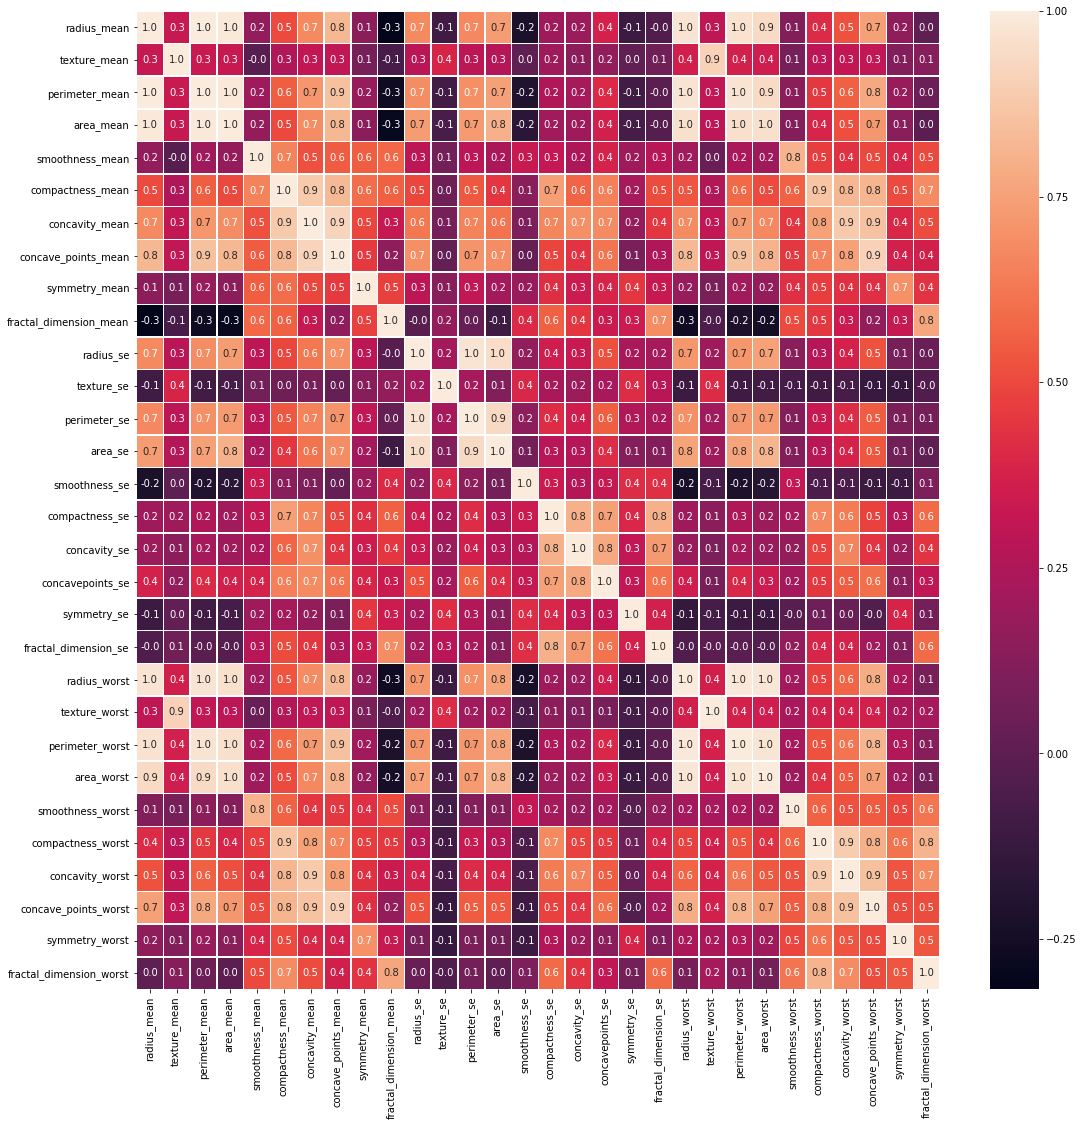

In [49]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(X.corr(),annot=True,linewidth=.5, fmt='.1f')

I've set up vectors to select features for you.

In [50]:
means = ["radius_mean","texture_mean","perimeter_mean","area_mean",
         "smoothness_mean","compactness_mean","concavity_mean","concave_points_mean",
         "symmetry_mean","fractal_dimension_mean"]
ses = ["radius_se","texture_se","perimeter_se",
         "area_se","smoothness_se","compactness_se","concavity_se","concave" "points_se",
         "symmetry_se","fractal_dimension_se"]
worsts = ["radius_worst","texture_worst",
         "perimeter_worst","area_worst","smoothness_worst","compactness_worst",
         "concavity_worst","concave_points_worst","symmetry_worst","fractal_dimension_worst"]

Text(0.5,1,'Correlation Among Means')

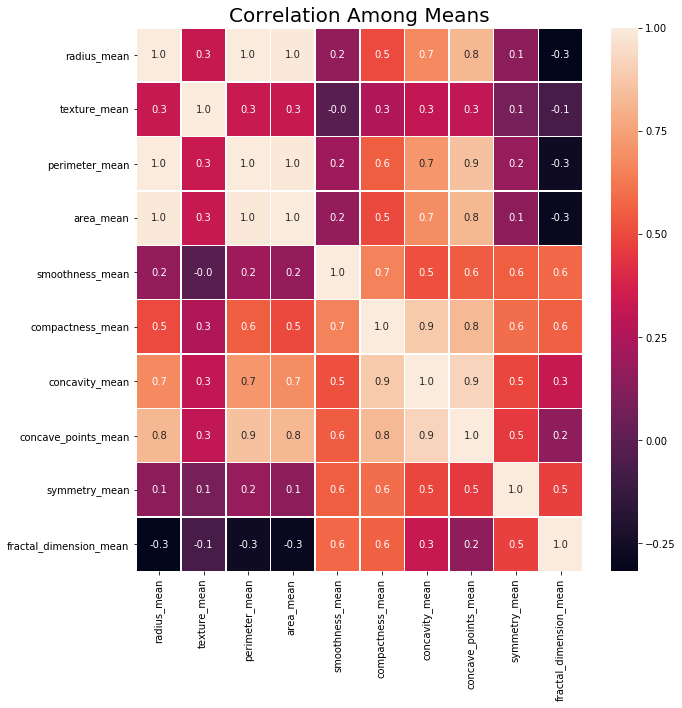

In [51]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(X[means].corr(),annot=True,linewidth=.5, fmt='.1f')

ax.set_title("Correlation Among Means",fontsize = 20)

No real surprises here from a geometric standpoint. Could there be a difference between the mean correlations for malignant and benign? 

Text(0.5,1,'Correlation for Benign')

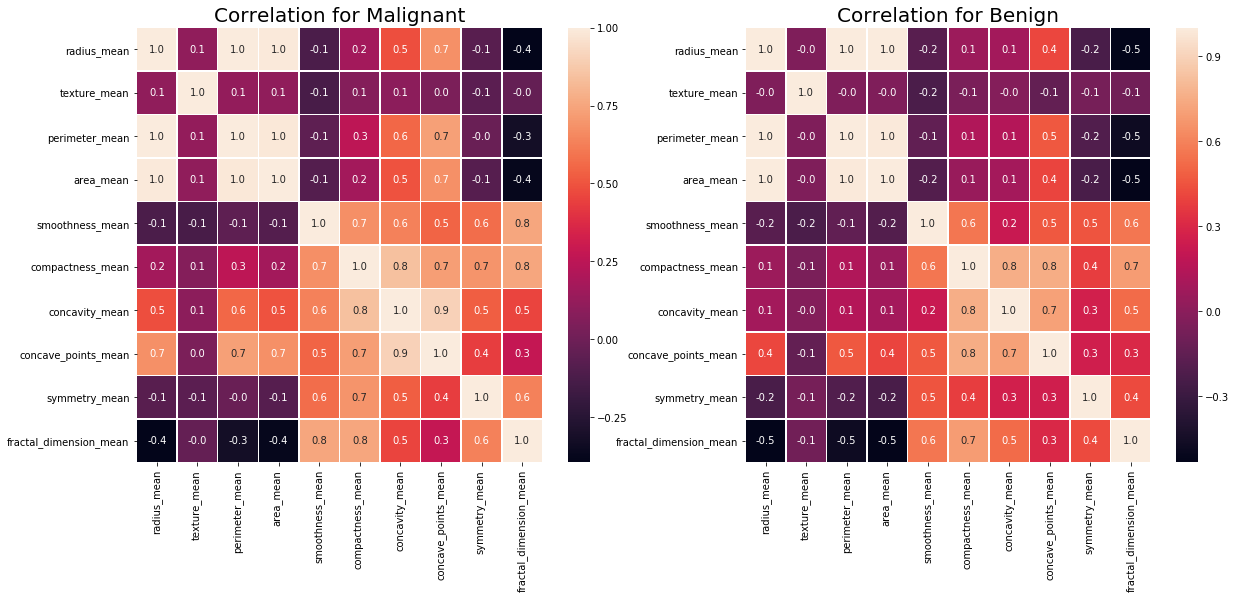

In [52]:
f,axes = plt.subplots(1,2,figsize=(20, 8))
I_m = y=="M"
I_b = y=="B"

sns.heatmap(X[means][I_m].corr(),annot=True,linewidth=.5, fmt='.1f',ax=axes[0])
sns.heatmap(X[means][I_b].corr(),annot=True,linewidth=.5, fmt='.1f',ax=axes[1])

axes[0].set_title("Correlation for Malignant",fontsize = 20)
axes[1].set_title("Correlation for Benign",fontsize = 20)

Notice that the heat maps above are not at the same scale. We can set the minimum and maximum for the colorbar, we just need to get the min and mix correlation:

In [53]:
I_m = y=="M"
I_b = y=="B"

vmin = min([X[means][I_m].corr().min().min(),X[means][I_b].corr().min().min()])
vmax = max([X[means][I_m].corr().max().max(),X[means][I_b].corr().max().max()])
print("Min:", vmin, ", Max:", vmax)

Min: -0.5334918868026371 , Max: 1.0


Text(0.5,1,'Correlation for Benign')

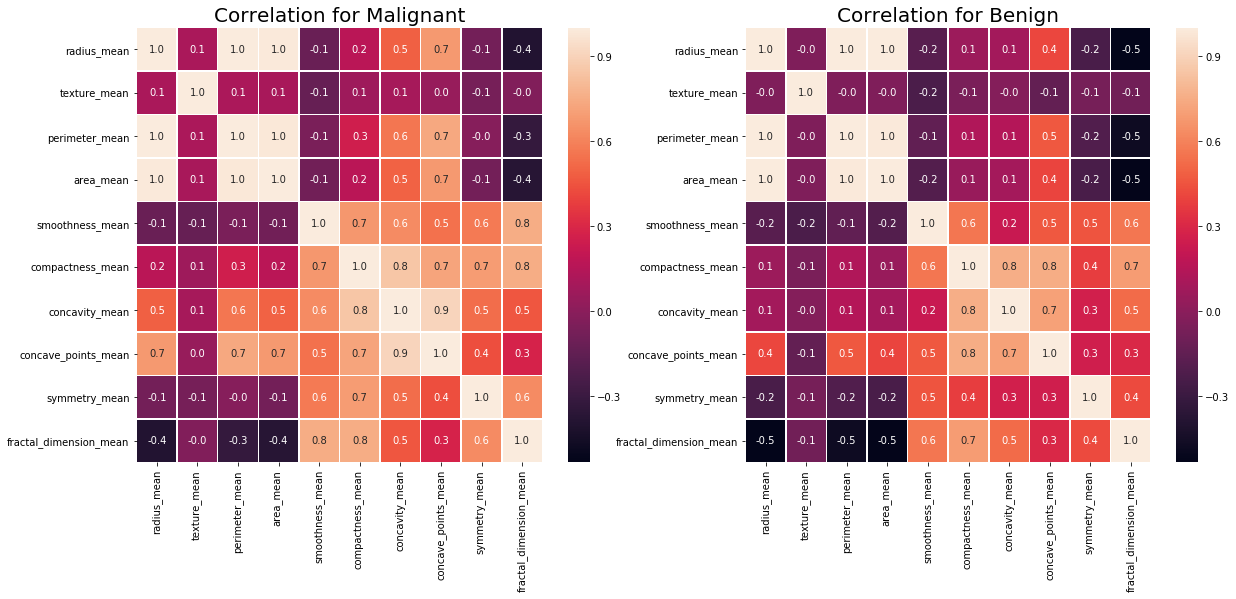

In [54]:
f,axes = plt.subplots(1,2,figsize=(20, 8))
I_m = y=="M"
I_b = y=="B"

sns.heatmap(X[means][I_m].corr(),annot=True,linewidth=.5, fmt='.1f',ax=axes[0],vmin=vmin,vmax=vmax)
sns.heatmap(X[means][I_b].corr(),annot=True,linewidth=.5, fmt='.1f',ax=axes[1],vmin=vmin,vmax=vmax)

axes[0].set_title("Correlation for Malignant",fontsize = 20)
axes[1].set_title("Correlation for Benign",fontsize = 20)

The mean is now much less correlated with the mean number of concave points. We don't need to guess, we can make this precise:

Text(0.5,1,'Correlation Difference Between Malignant and Benign')

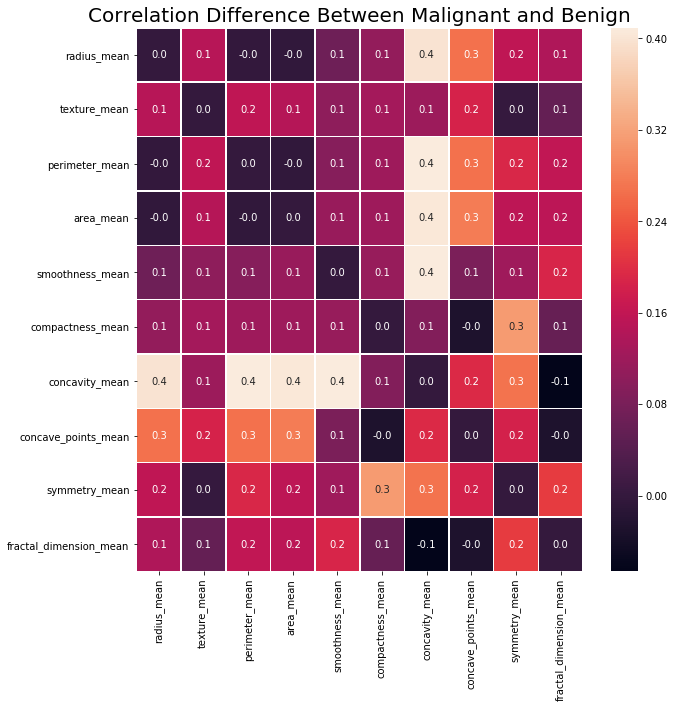

In [55]:
f,ax = plt.subplots(figsize=(10, 10))

sns.heatmap(X[means][I_m].corr() - X[means][I_b].corr(),annot=True,linewidth=.5, fmt='.1f')

ax.set_title("Correlation Difference Between Malignant and Benign",fontsize = 20)

## Distribution Plotting

### Box, Violin and Swarm Plots

Box, violin and swarm plots are all ways of trying to get a handle on the difference in feature distribution between the malignant and benign cells. A violin plot displays the conditional distributions next to each other for easy visual comparison. 

<img src="https://seaborn.pydata.org/_images/seaborn-violinplot-4.png">

The violin function works a little differently than other functions we have used. It takes a whole dataframe as an object and then asks us to specify which column contains the categories we want along the x-axis, which column contains the data whose distribution we want summarized, and finally which column contains the information about how the data should be labeled. 

* `sns.violinplot(x=, y=, hue=, data=data, split=True, inner="quart")` Here, split dtermins weather we will have split violins (as above) or side by side symmetric violins. The `inner = quart` line displays the quartiles one the violin plot. 

`sns.violinplot` really wants to see the data displayed in the following way:

|Color Label|X Category|Y Value|
|-----|--------|-----|
|(Smoker)|(Days)|(Tip Amount)|
|Yes| Sun| 5.40|
|No | Fri| 1.27|
|Yes| Sat| 4.41|
|Yes| Sat| 7.88|



For example, the code 

`sns.violinplot(x="diagnosis", y="radius_mean", hue="diagnosis", data=data, split=True, inner="quart")`

produces a violin plot for the variable __radius_mean__ colored by __diagnosis__. The include of `x="diagnosis"` indicates that on the $x$-axis we will be splitting the data up by the diagnosis. 

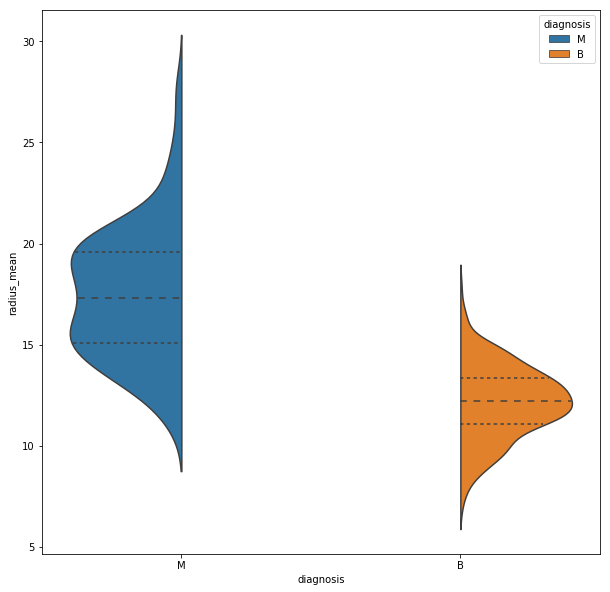

In [56]:
plt.figure(figsize=(10,10))
sns.violinplot(x="diagnosis", y="radius_mean", hue="diagnosis", data=data, split=True, inner="quart")

It's an annoying feature but if we want to make a single violin like we see above we have to include a dummy category vector `x=`, where all of the category are the same.  A simple way to do this is to just pass all 1's to the category vector:

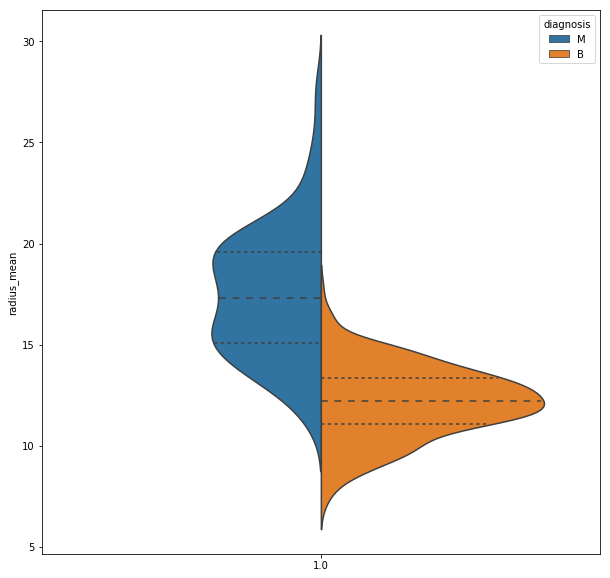

In [57]:
plt.figure(figsize=(10,10))
sns.violinplot(x=np.ones(568), y="radius_mean", hue="diagnosis", data=data, split=True, inner="quart")

To display all of the features side by side, we have to create a new dataframe of the form 

|Color Label|X Category|Y Value|
|-----|--------|-----|
|(diagnosis)|(Feature Name)|(Value)|
|B| radius_mean| 2.13|
|B| radius_mean| 1.27|
|M| radius_mean|-1.49|
|$\vdots$| $\vdots$| $\vdots$|
|B| area_mean| -1.32|
|M| area_mean| 0.41|

To do this, we use the `pandas.melt` function to flatten the dataframe into one long $3\times 30N$ data frame where the first column is the diagnosis, the second column is the corresponding feature and the third column is the value. First, we concatenate `y` back onto `X` and then we melt it to the proper form. 

* `pandas.melt(DataFrame, id_var=,var_name=,value_name)` Returns a dataframe of identifier varaibles while all other columns, considered measured variables (value_vars), are "unpivoted" to the row axis, leaving just two non-identifier columns, `variable` and `value` (to quote the documentation). [Doc.](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html)

For us, diagnosis will be the identifier variable, and we call the column of variable names "features" and the column of values "value". The violin plot is then give by letting the features (read: the variable names) run along the $x$-axis, the feature values be collected on the $y$-axis and the colors be determined by __diagnosis__.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

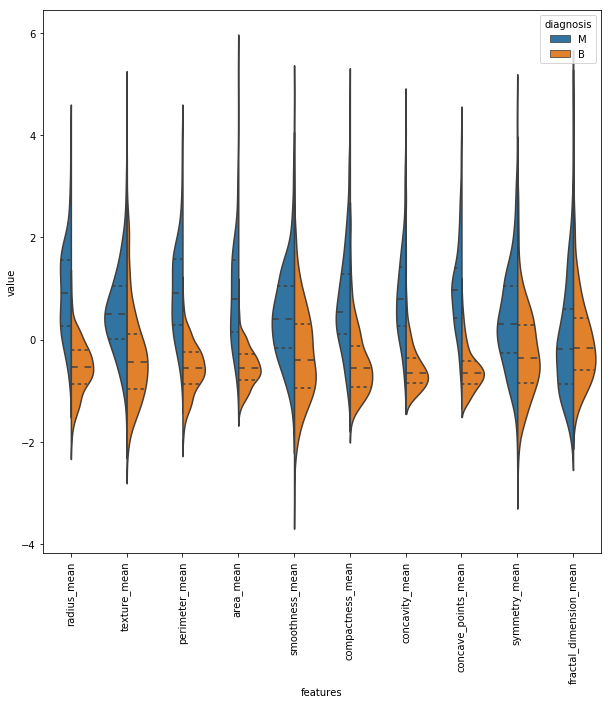

In [58]:
plt.figure(figsize=(10,10))

vio = pd.concat([y,X[means]],axis=1)
vio = pd.melt(vio,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

sns.violinplot(x="features", y="value", hue="diagnosis", data=vio,split=True, inner="quart")

plt.xticks(rotation=90)

We see that there is quiet a large difference for quite a few of the variables, including __radius_mean__, __area_mean__, __concave_points_mean__. 

#### Box plots

Box plots, like violin plots, compare the differences in distributions for different labels, but they do it in a more numerical way.

<img width=600px src="https://cdn-images-1.medium.com/max/1600/1*2c21SkzJMf3frPXPAR_gZA.png"> [Source](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51)

Here, __Q1__ is the first quartile boundary, so 25% of the data have values less than __Q1__. The inner line is the __median__ and __Q3__ is the third quartile boundary, so 75% of the data have values less than __Q3__.

The `seaborn.boxplot` function uses exactly the same syntax as the `seaborn.violinplot` function.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

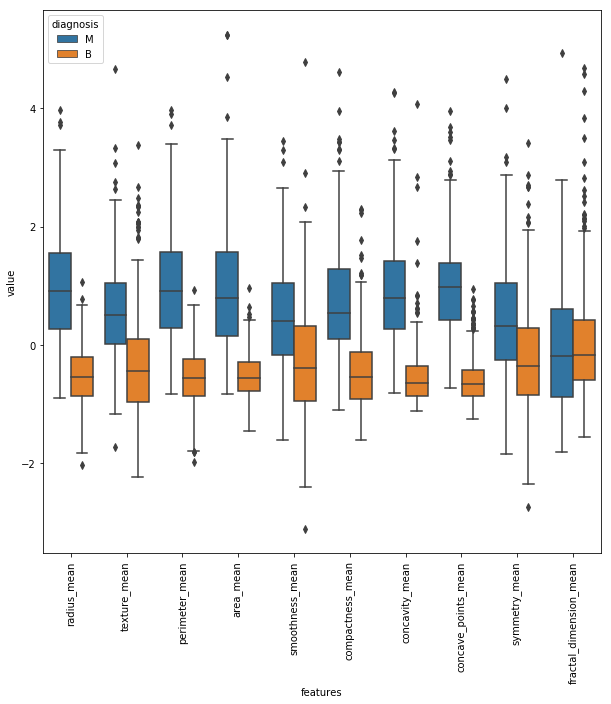

In [59]:
plt.figure(figsize=(10,10))

sns.boxplot(x="features", y="value", hue="diagnosis", data=vio)

plt.xticks(rotation=90)

It looks like __concave_points_mean__ is really starting to emerge as a favorite for indicating cancer.

#### Swarm Plots

A swarm plot is a representation of all of the data in your dataset in a set of nonoverlapping points. It gives a quick visual of how the points are distributed in a relative fashion. 

As before `sns.swarmplot` uses the same syntax as `sns.violinplot`, so once we done the work to melt our data along categories we can use seaborn to view it many different ways. 

Swarm plot may take a second to run. 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

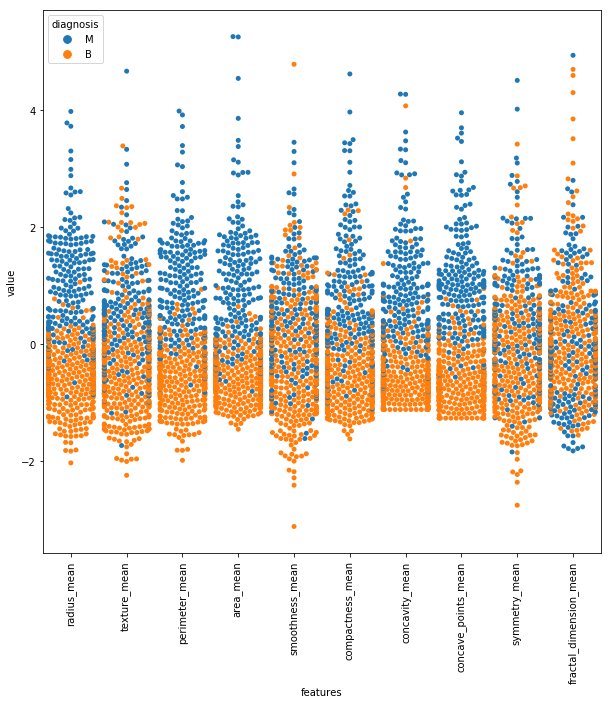

In [60]:
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=vio)
plt.xticks(rotation=90)

# Linear Regression for Binary Classifiers

Run the code below if you need to reload the data:

In [207]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data')
names = ["id","diagnosis","radius_mean","texture_mean","perimeter_mean","area_mean",
         "smoothness_mean","compactness_mean","concavity_mean","concave_points_mean",
         "symmetry_mean","fractal_dimension_mean","radius_se","texture_se","perimeter_se",
         "area_se","smoothness_se","compactness_se","concavity_se","concave" "points_se",
         "symmetry_se","fractal_dimension_se","radius_worst","texture_worst",
         "perimeter_worst","area_worst","smoothness_worst","compactness_worst",
         "concavity_worst","concave_points_worst","symmetry_worst","fractal_dimension_worst"]

data.columns=names


## Drop Feature Columns X
X = data.drop(columns=["id","diagnosis"])

## Set Up Target Variables y
y = data["diagnosis"]

## Normalize feature data by centering on the mean and dividing by std
X = (X - X.mean())/X.std()

We will now begin the actual fitting. For visual simplicity, lets first just consider fitting to two variables, __radius_mean__ and __concavity_mean__. 

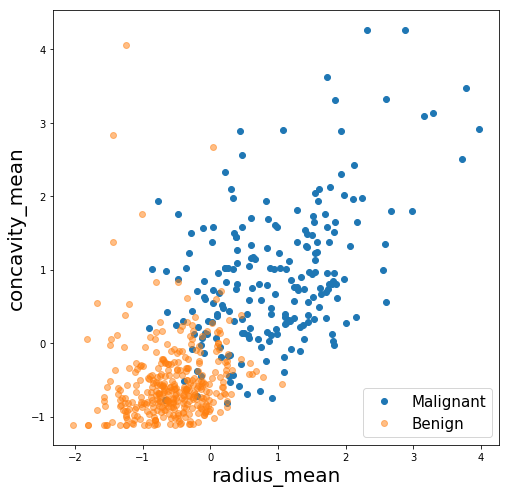

In [209]:
f, ax = plt.subplots(figsize=(8,8))

I_m = y=="M"
I_b = y=="B"

plt.plot(X["radius_mean"][I_m],X["concavity_mean"][I_m],'o',label="Malignant")

## We set alpha=.5 to try to avoid masking, but some points still will be burried. 
plt.plot(X["radius_mean"][I_b],X["concavity_mean"][I_b],'o',label="Benign",alpha=.5)

plt.xlabel("radius_mean",fontsize=20)
plt.ylabel("concavity_mean",fontsize=20)
plt.legend(fontsize=15)

## Categorical Vector Encoding.

We need to encode `y` as a one-hot vector. That is, we assign each label to a positional vector. In this case, let

|Label|Vector|
|-----|------|
|B|[1,0]|
|M|[0,1]|

There are two ways to do this: using built in tool kit and by hand. We will use pandas built in tools here, in the exercise you will proceed by hand. 

* `pd.get_dummies(y)` Converts categorical variables into dummy index variables. 

In [212]:
pd.get_dummies(y)

,B,M
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
563,0,1
564,0,1
565,0,1
566,0,1


In [210]:
y_train = pd.get_dummies(y)
display(y_train)

,B,M
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
563,0,1
564,0,1
565,0,1
566,0,1


## Linear Regression Using Sklearn

We then perform regression using sci-kit learn. The code below will reload the data:

In [137]:
from sklearn.linear_model import LinearRegression

X_train = X[['radius_mean',"concavity_mean"]]

lr = LinearRegression()
lr.fit(X_train,y_train)

print("The r^2 score on the training data is %.3f"%(lr.score(X_train,y_train),))

The r^2 score on the training data is 0.607


Let's extract the parameter and plot the decision boundary. As usual, let $(x_i,y_i)$ be our training data and let $y_i\in \{0,\ldots, k-1\}$ in keeping with Pythons convention of labeling from 0. From one perspective, we've fit two linear functions using linear regression

$$
y_B = y_0 \approx f_0(X) = {\beta}_{0,0} +  X_1{\beta}_{1,0} + X_2{\beta}_{2,0}\,\hspace{3em} 
y_M = y_1 \approx f_1(X) = {\beta}_{0,1} +  X_1{\beta}_{1,1} + X_2{\beta}_{2,1}
$$

We recover a categorical fit by selecting $\hat y_i =  \underset{k}{\text{argmax}} (\hat{f}_k(x_i))$. 

To find the decision boundary, we just need to find where $\hat{f}_0(X) = \hat{f}_1(X)$. Since these are linear functions, it is easy to solve for the hyperplane

$$
X_2 = \frac{(\hat{\beta}_{1,1}-\hat{\beta}_{1,0})X_1 + \hat{\beta}_{0,1} - \hat {\beta}_{0,0}}{\hat{\beta}_{2,0}-\hat{\beta}_{2,1}}\,.
$$

In fact, $\hat f_0 = 1-\hat f_1$ for two label linear regression (__exercise__) so we could just solve $\hat f_0 = .5$, but for multilabel classification this is what generalizes. 

Extracting the $\beta$ values from the fit using `lr.coef_` and `lr.intercept_` we can plot the decision boundary on the scatter plot. 

In [138]:
B0 = lr.intercept_
B = lr.coef_

print("The Linear Coefficients:\n", B)
print("The Intercept:", B0)

The Linear Coefficients:
 [[-0.23075012 -0.18031765]
 [ 0.23075012  0.18031765]]
The Intercept: [0.62852113 0.37147887]


We want to make a plot of the decision regions. To do this we construct a dense grid of points an use the fit linear classifier to predict the label for each point. 

<div class="alert alert-block alert-warning">
Side note: It is important to remember that although in mathematical plotting $x$ runs from left to right and $y$ runs from bottom to top, in __plotting__ we often use the matrix convention, that is the top left corner of the matrix is the top left pixel, bottom right corner of the matrix is the bottom right pixel. This means that if a matrix is indexed by $(i,j)$, $i$ increases from left to right, but $j$ increases from _top to bottom_. It's because of this convention that meshgrid below returns what it does. Keep this in mind when plotting with matrices. 
</div>

We will use the `np.meshgrid` function to generate the grid of points:

* `XX, YY = np.meshgrid(XRange, YRange)` - Given a vector $x = (x_1,\ldots, x_n)$ of values `XRange` and a vector $y = (y_1,\ldots, y_m)$ of values `YRange`, meshgrid constructs all of the pairs $(x_i,y_j)$ and returns two $m\times n$ matrices: `XX` containing the $x$ coordinates of the pairs and `YY` containing the $y$ coordinates of the pairs.

For example, if $x = [1,3,4]$ and $y = [2,5]$, meshgrid will return
$$
XX = \left[
\begin{matrix}
1&3&4
\\
1&3&4
\end{matrix}
\right]
\,,\,\,\,
YY = \left[
\begin{matrix}
2&2&2
\\
5&5&5
\end{matrix}
\right]\,.
$$

Practically, this means that $(x_i,y_j) = (XX[j,i],YY[j,i])$. The index reversal is occurs because the second component of `XX` and `YY` parameterizes the horizontal directions.

In [139]:
x_ex = [1,3,4]
y_ex = [2,5]
XX,YY = np.meshgrid(x,y_ex)

print(XX,'\n',YY)

print(XX[0,1],YY[0,1])

[[1 3 4]
 [1 3 4]] 
 [[2 2 2]
 [5 5 5]]
3 2


The code below shows how you can use meshgrid to generate predictions for a dense grid of values. 

(-1.384303992198726, 4.536430082840006)

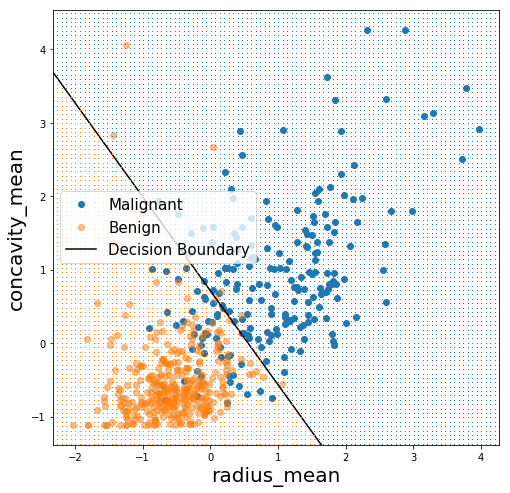

In [140]:
f, ax = plt.subplots(figsize=(8,8))

X1 = X["radius_mean"]
X2 = X["concavity_mean"]

plt.plot(X1[I_m],X2[I_m],'o',label="Malignant")
plt.plot(X1[I_b],X2[I_b],'o',label="Benign",alpha=.5)


## We want to make a nice clean line directly across the graph as it was before
## The best way to do this is to find the limits of the graph and plot using them 

xm,xM = plt.xlim()
ym,yM = plt.ylim()

u = np.linspace(xm,xM, 2)
v = (u*(B[0,0]-B[1,0]) + B0[0]-B0[1])/(B[1,1]-B[0,1])
plt.plot(u,v,label="Decision Boundary",color="black")


## We also may also want to color in the side of the decicion boundry we're
## Labeling each point. One way to do this is using a mesh grid, and then using
## an indexon the equation from before

XX, YY = np.meshgrid(np.linspace(xm,xM, 100),np.linspace(ym,yM, 100)) 

z1 = YY >(XX*(B[0,0]-B[1,0]) + B0[0]-B0[1])/(B[1,1]-B[0,1])
z2 = YY <(XX*(B[0,0]-B[1,0]) + B0[0]-B0[1])/(B[1,1]-B[0,1])

plt.plot(XX[z1],YY[z1],',',color="C0")
plt.plot(XX[z2],YY[z2],',',color="C1")

## We now reset the x and y limits to make sure our view is centered tightly
## around the data. 

plt.xlabel("radius_mean",fontsize=20)
plt.ylabel("concavity_mean",fontsize=20)
plt.legend(fontsize=15)

ax.set_xlim([xm, xM])
ax.set_ylim([ym, yM])

## (Linear) Quadratic Discriminant Analysis (QDA)

Recall that in quadratic discriminant analysis, we assume a Gaussian distribution for each label

$$
y_k \approx f_k(X) = \big[(2\pi)^p |\mathbf{\Sigma}| \big]^{-\frac12}\exp\left(\,-\frac12(x-\mu_k)^T\mathbf{\Sigma}^{-1}(x-\mu_k)  \,\right)\,,
$$

Where $\mu$ is the center of the label distribution, $\mathbf{\Sigma}$ is the covariance matrix. The discriminant functions are then quadratic, and given by 

$$
\delta_k(x) = -\frac12\log|\mathbf{\Sigma}_k| - \frac12 (x-\mu_k)^T\mathbf{\Sigma}_k^{-1}(x-\mu_k) + \log \pi_k\,.
$$



<div class="alert alert-block alert-warning">
Sci-kit learn has a QDA library, but if you need to you can estimate the parameters by <br><br>
$\hat \pi_k = N_k/N$, where $N_k$ is the number of observations of $k$. Stored in `qda.priors_`. <br>
$\hat\mu_k  = \frac{1}{N_k}\sum_{y_i = k} x_i$ is the mean of $k$ observations. Stored in `qda.means_`.<br>
$\hat{\mathbf{\Sigma}} = \frac{1}{N-K}\sum_{k=1}^K\sum_{y_i=k}||x_i - \hat \mu_k||^2$ estimates covariance. Stored in `qda.covariance_`.<br>
</div>

Using sci-kit learn's `QuadraticDiscriminantAnalysis` class from the `discriminant_analysis` library, we can fit the function as before. You can use the code below to compute the linear decision boundary by just changing the function call. 

In [141]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis(store_covariance=True)
qda.fit(X_train, y)
print("Score: %.3f"%qda.score(X_train,y))

Score: 0.917


This seems to do a lot better than regression, but can we trust it? Indeed, this is scoring itself using a different metric to regression. Regression uses least squares while QDA used mean accuracy (mean number of correct prediction). 

__Question:__ Which score would you expect regression to the best with respect to, the $r^2$ score or the mean accuracy?

We will now use fit object's `predict` function to generate the background labels.

(-1.384303992198726, 4.536430082840006)

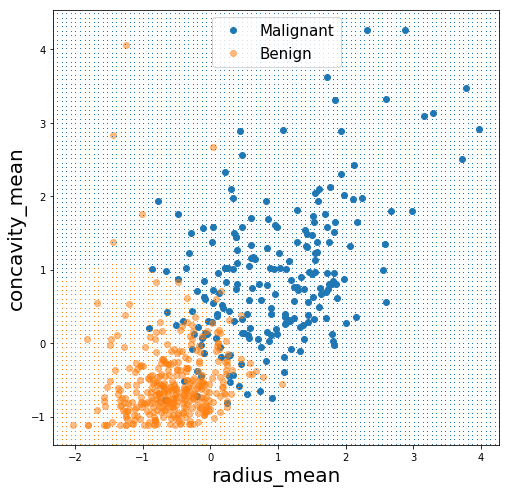

In [142]:
f, ax = plt.subplots(figsize=(8,8))

X1 = X["radius_mean"]
X2 = X["concavity_mean"]

plt.plot(X1[I_m],X2[I_m],'o',label="Malignant")
plt.plot(X1[I_b],X2[I_b],'o',label="Benign",alpha=.5)

## As before we generate a meshgrid, but now we use qda.predict to guess at the label. 

xm,xM = plt.xlim()
ym,yM = plt.ylim()

XX, YY = np.meshgrid(np.linspace(xm,xM, 100),np.linspace(ym,yM, 100)) 

## We now form a 10000x2 array of the (x,y) coordiantes for each point by reshaping
## the XX and YY matricies and pasting them together. We need to feed a Nx2 vector
## into the qda.predict function, otherwise it will think we have too many features.
## We can reshape it later to get our grid back

grid=np.concatenate([XX.reshape(-1,1),YY.reshape(-1,1)],axis=1)

ZZ = qda.predict(grid).reshape(XX.shape)  ## We predict, and reshape back to the origional grid

z1 = ZZ == 'M'
z2 = ZZ == 'B'

plt.plot(XX[z1],YY[z1],',',color="C0")
plt.plot(XX[z2],YY[z2],',',color="C1")

## We now reset the x and y limits to make sure our view is centered tightly
## around the data. 

plt.xlabel("radius_mean",fontsize=20)
plt.ylabel("concavity_mean",fontsize=20)
plt.legend(fontsize=15)

ax.set_xlim([xm, xM])
ax.set_ylim([ym, yM])

Plotting the decision boundary for QDA is more difficult than in the linear case. If you are interested in a well worked out example the official documentation has one here: https://scikit-learn.org/stable/auto_examples/classification/plot_lda_qda.html#sphx-glr-auto-examples-classification-plot-lda-qda-py

#### Exercise:

Write a formula for the QDA decision boundary in terms of the mean, prior, and covariance. Implement your formula in Python. 

## Linear discriminant analysis

Compare the above the LDA here below. We have only changed two things: First, we call `LinearDiscriminantAnalysis` instead of quadratic and second we have added the discriminant line from the regression analysis in. Notice that both match up. 

Score: 0.910


(-1.384303992198726, 4.536430082840006)

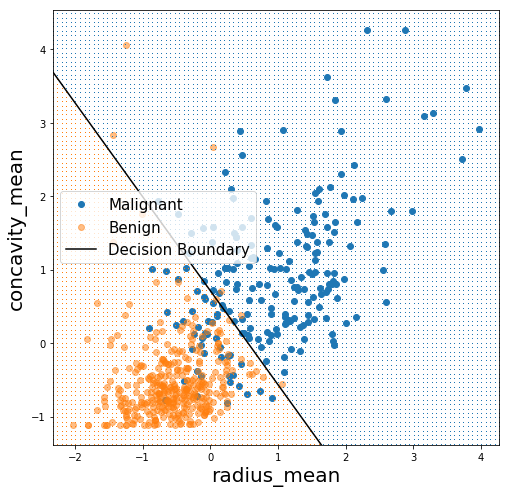

In [143]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

qda = LinearDiscriminantAnalysis(store_covariance=True)
qda.fit(X_train, y)

print("Score: %.3f"%qda.score(X_train,y))

f, ax = plt.subplots(figsize=(8,8))

X1 = X["radius_mean"]
X2 = X["concavity_mean"]

plt.plot(X1[I_m],X2[I_m],'o',label="Malignant")
plt.plot(X1[I_b],X2[I_b],'o',label="Benign",alpha=.5)

## As before we generate a meshgrid, but now we use qda.predict to guess at the label. 

xm,xM = plt.xlim()
ym,yM = plt.ylim()

XX, YY = np.meshgrid(np.linspace(xm,xM, 100),np.linspace(ym,yM, 100)) 

## We now form a 10000x2 array of the (x,y) coordiantes for each point by reshaping
## the XX and YY matricies and pasting them together. We need to feed a Nx2 vector
## into the qda.predict function, otherwise it will think we have too many features.
## We can reshape it later to get our grid back

grid=np.concatenate([XX.reshape(-1,1),YY.reshape(-1,1)],axis=1)

ZZ = qda.predict(grid).reshape(XX.shape)  ## We predict, and reshape back to the origional grid

z1 = ZZ == 'M'
z2 = ZZ == 'B'

plt.plot(XX[z1],YY[z1],',',color="C0")
plt.plot(XX[z2],YY[z2],',',color="C1")

plt.plot(u,v,label="Decision Boundary",color="black")

## We now reset the x and y limits to make sure our view is centered tightly
## around the data. 

plt.xlabel("radius_mean",fontsize=20)
plt.ylabel("concavity_mean",fontsize=20)
plt.legend(fontsize=15)

ax.set_xlim([xm, xM])
ax.set_ylim([ym, yM])

## Logistic regression

The logistic regression classifier has logistic discriminant functions

$$
y_j \approx \mathbb{P}(G=j|X=x) = \frac{\exp(\beta_{j,0}+x^T\beta_j)}{1+\sum_{\ell=1}^{K-1}\exp(\beta_{\ell,0} + x^T\beta_\ell)}\,,\hspace{1em} \forall j=1,\ldots, K-1\,,
$$
and 
$$
y_K \approx \mathbb{P}(G=K|X=x)  = \frac{1}{1+\sum_{\ell=1}^{K-1}\exp(\beta_{\ell,0} + x^T\beta_\ell)}\,.
$$

Again, sci-kit learn has a built in classifier in `sklearn.linear_model`, the `LogisticRegression` class [Doc](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

In [144]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train,y)

print("Score: %.3f"%clf.score(X_train,y))

Score: 0.907


(-1.384303992198726, 4.536430082840006)

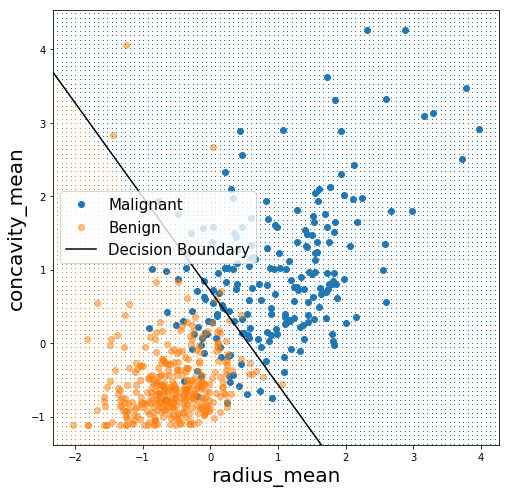

In [145]:
f, ax = plt.subplots(figsize=(8,8))

X1 = X["radius_mean"]
X2 = X["concavity_mean"]

plt.plot(X1[I_m],X2[I_m],'o',label="Malignant")
plt.plot(X1[I_b],X2[I_b],'o',label="Benign",alpha=.5)

## As before we generate a meshgrid, but now we use qda.predict to guess at the label. 

xm,xM = plt.xlim()
ym,yM = plt.ylim()

XX, YY = np.meshgrid(np.linspace(xm,xM, 100),np.linspace(ym,yM, 100)) 

## We now form a 10000x2 array of the (x,y) coordiantes for each point by reshaping
## the XX and YY matricies and pasting them together. We need to feed a Nx2 vector
## into the qda.predict function, otherwise it will think we have too many features.
## We can reshape it later to get our grid back

grid=np.concatenate([XX.reshape(-1,1),YY.reshape(-1,1)],axis=1)

ZZ = clf.predict(grid).reshape(XX.shape)  ## We predict, and reshape back to the origional grid

z1 = ZZ == 'M'
z2 = ZZ == 'B'

plt.plot(XX[z1],YY[z1],',',color="C0")
plt.plot(XX[z2],YY[z2],',',color="C1")

plt.plot(u,v,label="Decision Boundary",color="black")

## We now reset the x and y limits to make sure our view is centered tightly
## around the data. 

plt.xlabel("radius_mean",fontsize=20)
plt.ylabel("concavity_mean",fontsize=20)
plt.legend(fontsize=15)

ax.set_xlim([xm, xM])
ax.set_ylim([ym, yM])

## Cross Validation with Sci-Kit Learn

We see that logistic regression actually does a bit _worse_ than linear regression. This is probably not surprising, we know that linear regression should perform well when only being compared to the dataset itself. We would expect to gain something if we split the data and tried cross validation. We will use the `train_test_split` library from sci-kit learns `model_selection` library.

* `train_test_split(X,y, test_size=, random_state)` Splits the `X` and `y` data into four pieces: `X_train`, `X_test`, `y_train`, and `y_test`. You may split by number or by percentage. You may use `random_state` to specify a random seed so that you can recover the splitting. if need be. 

It's a good exercise to see how the relative prediction accuracy changes as we change the `test_size` parameter. 

In [236]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X[["radius_mean","concavity_mean"]], 
                                                    y, test_size=0.4)




## Linear Regression Analysis

lda = LinearRegression()
lda.fit(X_train, pd.get_dummies(y_train))
y_hat = np.argmax(lda.predict(X_test), axis=1)
y_true = np.argmax(np.matrix(pd.get_dummies(y_test)), axis=1)
print("Linear Regression Score: %.3f"%accuracy_score(y_hat,y_true))

## Linear Discriminant Analysis

lda = LinearDiscriminantAnalysis(store_covariance=True)
lda.fit(X_train, y_train)
print("LDA Score: %.3f"%lda.score(X_test,y_test))

## Quadratic Discriminant Analysis

qda = QuadraticDiscriminantAnalysis(store_covariance=True)
qda.fit(X_train, y_train)
print("QDA Score: %.3f"%qda.score(X_test,y_test))

## Logisitic Regression

clf = LogisticRegression()
clf.fit(X_train,y_train)
print("Logistic Regression Score: %.3f"%clf.score(X_test,y_test))

Linear Regression Score: 0.895
LDA Score: 0.895
QDA Score: 0.908
Logistic Regression Score: 0.904


## Building Utility Functions:

You will notice that we have repeated a lot of the same code in the three examples above. Once we've gotten a piece of code running the way we want it it can be very useful to write it up as a function to be used later. In the code below, we will show how to write the graphing of the decision boundary in a function `predict_labels`. Since we may want to compare decision boundaries, we need to pass the function three things: The data `X` and `y`, the classifier, and the axis to be written to:

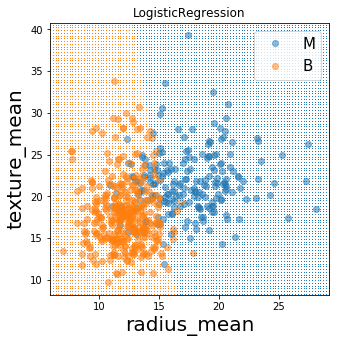

In [170]:
def predict_labels(X,y,ax,pred):
    [col0,col1] = X.columns
    labels = set(y)
    
    ## Plot Datapoints By Label
    for l in labels:
        X_l = X[y==l]
        ax.plot(X_l[col0],X_l[col1],'o',label=l,alpha=.5)
        
    ax.set_xlabel(col0,fontsize=20)
    ax.set_ylabel(col1,fontsize=20)
    ax.legend(fontsize=15)
    
    ### Predict on Grid
    xm,xM = ax.get_xlim()
    ym,yM = ax.get_ylim()
    XX, YY = np.meshgrid(np.linspace(xm,xM, 100),np.linspace(ym,yM, 100)) 
    
    grid=np.concatenate([XX.reshape(-1,1),YY.reshape(-1,1)],axis=1)
    ZZ = pred.predict(grid).reshape(XX.shape)  ## We predict, and reshape back to the origional grid
    z1 = ZZ == 'M'
    z2 = ZZ == 'B'
    ax.plot(XX[z1],YY[z1],',',color="C0")
    ax.plot(XX[z2],YY[z2],',',color="C1")
    
    ax.set_xlim([xm, xM])
    ax.set_ylim([ym, yM])
    ax.set_title(type(pred).__name__)
    

    
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
X = data[["radius_mean","texture_mean"]]
clf.fit(X,y)
    
f, ax = plt.subplots(figsize=(5,5))   
predict_labels(X,y,ax,clf)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


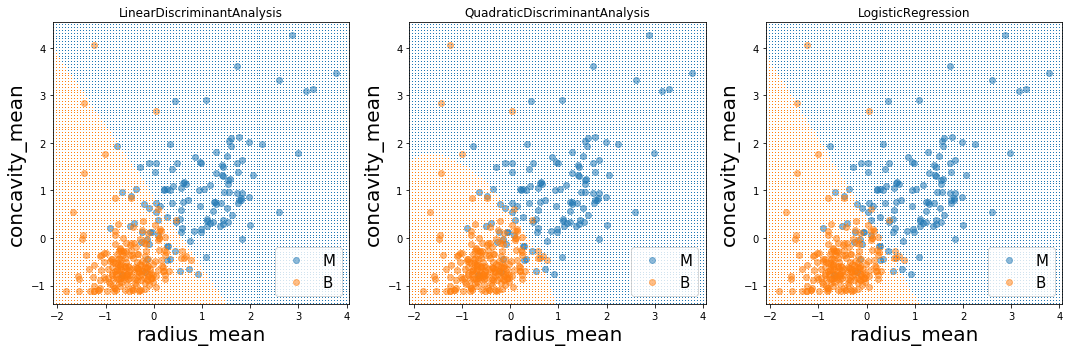

In [171]:
## Liner Regression vis Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis(store_covariance=True)
lda.fit(X_train, y_train)

## Quadratic Discriminant Analysis
qda = QuadraticDiscriminantAnalysis(store_covariance=True)
qda.fit(X_train, y_train)

## Logisitic Regression
clf = LogisticRegression()
clf.fit(X_train,y_train)

## Plotting:
f, axes = plt.subplots(1,3, figsize=(15,5))
axes = axes.ravel()

for i, pred in enumerate([lda, qda, clf]):
    predict_labels(X_train,y,axes[i],pred)

plt.tight_layout()

#### Exercise:

Extend the plotting function above to also provide the scores for each predictor. These scores can be reported in the title, or as an annotation (https://matplotlib.org/tutorials/text/annotations.html)

# Multilabel Classification

Now that we have some classification and visualization tools under our belt, lets turn to a high dimensional problem: Using linear methods to classify the MNIST (Mixed National Institute of Standards and Technology) dataset. MNIST is essentially the "Hello World" of visual machine learning.

<table>
    <tr><td>
        <img src="https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png" width=300px>
        </td>
        </td><td width=20px>
            $$\Rightarrow$$
        </td>
        <td width=40px>
        <table><tr><td>0</td></tr><tr><td>1</td></tr><tr><td>2</td></tr><tr><td>3</td></tr>
        <tr><td>4</td></tr><tr><td>5</td></tr><tr><td>6</td></tr><tr><td>7</td></tr><tr><td>8</td></tr>
            <tr><td>9</td></tr>
        </table>
        </td>
    </tr>
</table>

Our goal with MNIST will be to correctly predict the number for picture. 

It's worth taking a look at MNIST's home: http://yann.lecun.com/exdb/mnist/, where they have the current best benchmarks on the dataset (of course reproducibility is required). 

Alternatively, you can download it from Kaggle https://www.kaggle.com/c/digit-recognizer/data (if you cannot open .gz files) or if you are on Google colab, use 

`from keras.datasets import mnist`

`(x_train, y_train), (x_test, y_test) = mnist.load_data()`

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

## If your files have been saved locally:

#MNIST_train = pd.read_csv("MNIST_train.csv")
#MNIST_test = pd.read_csv("MNIST_train.csv")

In [39]:
print(X_train.shape)
print(X_test.shape)
#X_train

(42000, 28, 28)
(10000, 28, 28)


Each row of the data set consists of a label, and list of 784 pixel values (either 0 to 255), forming $28\times 28$ pictures . If you downloaded the data locally, you may need to split into training features and labels and recast the data as a numpy array to make it easier to call. 

In [4]:
y_train = np.array(MNIST_train["label"])
X_train = np.array(MNIST_train.drop(columns=["label"]))

y_test = np.array(MNIST_test["label"])
X_test = np.array(MNIST_test.drop(columns=["label"]))

NameError: name 'MNIST_train' is not defined

Visualizing one of the pictures is simple enough, we just use `.reshape(28,28)` on a row of `X_train` and then use `plt.imshow` to display the pixels of the matrix as black and white. 

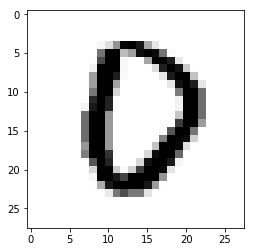

In [5]:
plt.imshow(X_train[702].reshape(28,28), cmap='Greys')

This looks like a 4, and that is what the label tells us:

In [6]:
y_train[700]

4

As one last step before we get started lets shuffle the data set to makes sure we're not picking up any information from the order. To do this we use `numpy.permutation` to generate a permutation of the index:

In [7]:
shuffle_index = np.random.permutation(42000)
X_train = X_train[shuffle_index]
y_train = y_train[shuffle_index]

## Some visualizations

It's hard to visualize high dimensional data. The visualization of high dimensional data is a whole lab in and of itself, but we can extract some interesting information (or at least some clarifying information!). 

First, lets find the "average" examples of each number:

(-0.5, 27.5, 27.5, -0.5)

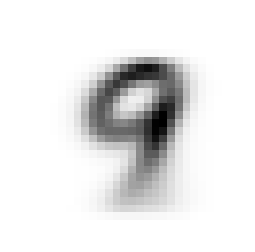

In [8]:
plt.imshow(X_train[y_train == 9].mean(0).reshape(28,28), cmap='Greys')

plt.axis('off')

Looping through the possible labels, we can construct a grid of images

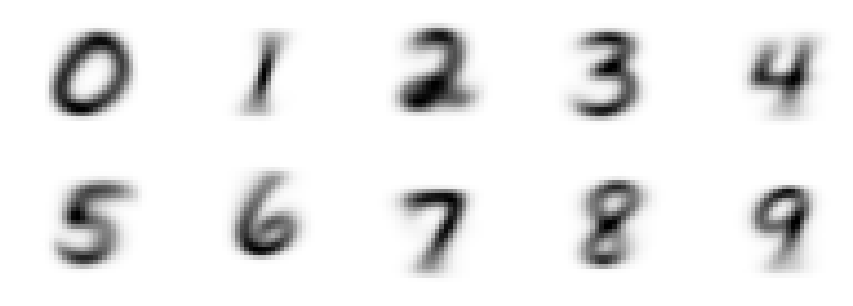

In [9]:
f, axes = plt.subplots(2,5,figsize=(15,5))

axes = axes.reshape(-1)

for i in range(0,10):
    axes[i].imshow(X_train[y_train == i].mean(0).reshape(28,28), cmap='Greys')
    axes[i].axis('off')

We can also form the pixel by pixel scatter plot, just to see if there is any structure here. We'll light up two adjacent pixels in the very middle: on the pixels 14 and 15 on row 14:

In [10]:
X_train.shape

(42000, 28, 28)

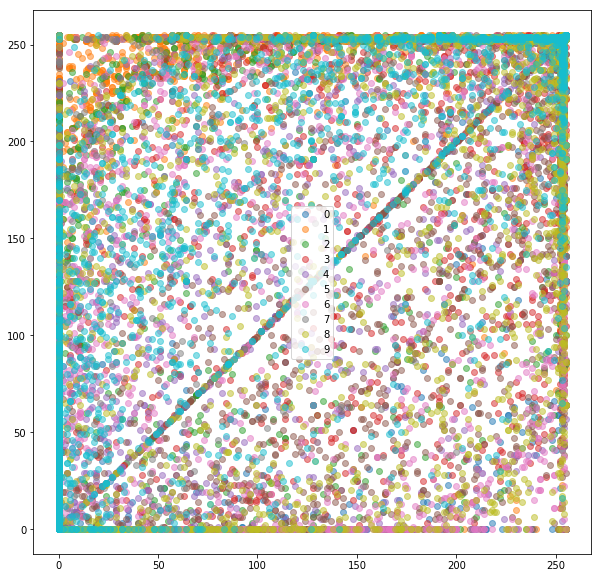

In [11]:
f, ax = plt.subplots(figsize=(10,10))
for i in range(0,10):
    plt.plot(X_train[y_train == i,13,13],X_train[y_train == i,13,14],'o',alpha=.5,label=i)
    
ax.legend()

There's something going on here, but it's not clear what. Maybe if we could project onto the correct dimension this would yield something but as we see the distribution is nontrivial. 

## Testing Our Classifiers: Logistic Regression

Lets start by trying to fit using logistic regression. There is nothing new that we need to do, the regression functions treat a large amount of data the same way as they treat a small amount of data. With logistic regression we don't even need to worry about one-hot encoding the labels. 

In [8]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train[0:3000].reshape(-1, 28*28),y_train[0:3000])
print("Logistic Regression Score: %.3f"%clf.score(X_test.reshape(-1, 28*28),y_test))

Logistic Regression Score: 0.834


This is quite good, so on average we're only missclassifying 15% pictures. Given that there is only one correct label and 10 incorrect ones this is a decent result. 

Remember as well that we have created a real predictor. For example, we can try to predict the 6001'st element of the MNIST data set:

In [83]:
print(clf.predict(X_test[6000].reshape(1,-1)))
print(y_test[6000])
print(clf.predict_proba(X_test[6000].reshape(1,-1)))

[9]
9
[[1.35812920e-19 1.20848701e-07 2.52161471e-16 5.51858714e-18
  2.07741907e-04 1.90795057e-21 2.36554113e-18 1.98774461e-02
  1.35676146e-11 9.79914691e-01]]


### New predictions

Try something yourself: Using MS paint or another program, create a $28\times 28$ picture with a black background and draw a which number on it. Save the picture as a bitmap in the same directory as the notebook. 

We can load this picture in with `plt.imread("picname.bmp")` and use `plt.imshow` to display it.

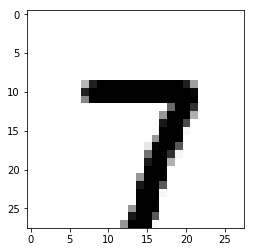

In [10]:
im = plt.imread("testpic.png")
plt.imshow(im,cmap='Greys')

If you look at the shape of the file, you'll see that it is `im.shape = (28,28,4)`. That means it has 4 channels: Red, Green, Blue and Alpha or RGBA. We've been fitting one channel black and white pictures, so to predict you must extract a single channel of data and reshape it from a matrix into a vector. If the picture is black and white the Red, Green and Blue channels will all contain the same information so we can just extract the zero'th channel.

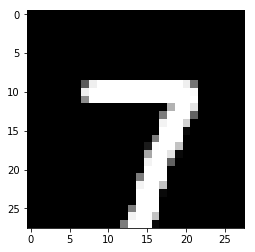

In [11]:
plt.imshow(im[:,:,0],cmap='Greys')

In addition, looking at `im[:,:,0]` we find that while `X_train` has data stored between 0 and 255, `im[:,:,0]` has the background as 1 and the foreground as 0. We need to rescale `im[:,:,0]` to be on the same order as the classifier.

In [12]:
im[:,:,0]

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.    

In [13]:
mypic = 255*(1-im[:,:,0].reshape(1,-1))
print(clf.predict(mypic))
print(clf.predict_proba(mypic))

[7]
[[1.25130885e-16 1.57484388e-23 1.96194625e-41 9.36727435e-28
  2.55690119e-30 2.20848729e-28 7.93064811e-28 1.00000000e+00
  4.28345728e-43 2.07509555e-23]]


How did it do? If it's drastically off make sure you're picture is black on white, not white on black. 

## Testing Our Classifiers: LDA and QDA

Lets now compare these to the results for the quadratic and linear discriminant classifiers. First, you should notice that they run significantly faster than regression, and in fact we can crank up the number of training samples quite high. As expected, the more training data points we use the better our testing results are, but although that number shoots upward between 100 and 1000 data points, the rate of change tapers off as we pass 10,000 data points. 

In [147]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

## Liner Regression vis Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis(store_covariance=True)
lda.fit(X_train[0:20000].reshape(-1,28*28), y_train[0:20000])
print("LDA Score: %.3f"%lda.score(X_test.reshape(-1,28*28),y_test))


LDA Score: 0.872


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [135]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

## Quadratic Discriminant Analysis
qda = QuadraticDiscriminantAnalysis(store_covariance=True)
qda.fit(X_train[0:10000].reshape(-1,28*28), y_train[0:10000])
print("QDA Score: %.3f"%qda.score(X_test.reshape(-1,28*28),y_test))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QDA Score: 0.654


How does each of our classifiers do fitting our handwritten digit?

In [148]:
print("Logistic:",clf.predict(mypic))
print("Linear:",lda.predict(mypic))
print("Quadratic:",qda.predict(mypic))

Logistic: [3]
Linear: [3]
Quadratic: [3]


# Linear Regression

Finally, we will use straight linear regression. Recall our pipeline for linear regression:

* Convert the y values to a one-hot vector.
* Fit using linear regression.
* Predict using argmax

You might be surprised to see how much data we can squeeze through the standard linear classifier. You may even be able to train on the whole data set without any slowdown depending on your processor. 

In [150]:
from sklearn.linear_model import LinearRegression
N = 40000

y_train_OH = pd.get_dummies(y_train)
y_test_OH = pd.get_dummies(y_test)

lr = LinearRegression()
lr.fit(X_train[0:N].reshape(-1,28*28),y_train_OH[0:N])

print("The r^2 score on the training data is %.3f"%(lr.score(X_test.reshape(-1,28*28),y_test_OH)))

The r^2 score on the training data is -53770747709261216.000


How do we understand the score of this model? Is it just completely missclassifying the test data? Lets use `np.argmax` to predict the score on the first image in the training set. Rather annoyingly, we must use

`X_test[0].reshape(1, -1)`

to reshape the vector into a row vector since numpy returns single vectors as column vectors by default. But then, we're used to all vectors being column vectors unless otherwise stated!

In [151]:
pred = lr.predict(X_test[0].reshape(1, -1))
print(pred)

[[ 0.02568292 -0.00801656  0.11541523  0.11903155 -0.12455918 -0.00930819
  -0.02148904  0.89316925 -0.08385697  0.09406162]]


We've return the linear predictors for each label, we will use `np.argmax` to return the position of the larges $\hat{f}_k$. Although by looking we can see it is 1, (remember the indexing starts from 0). We also check the true value.

In [152]:
print("Our Prediction:", np.argmax(pred))
print("True Value:", y_test[0])

Our Prediction: 7
True Value: 7


So it got the first one correct, what about the first five? Again, we can use `np.argmax`, although we need to specify that we're taking argmax for down the columns by specifying `axis=1`.

In [154]:
print("First Five Predictions:", np.argmax(lr.predict(X_test[0:5].reshape(-1,28*28)), axis=1))
print("First Five True Labels:", y_test[0:5])

First Five Predictions: [7 2 1 0 4]
First Five True Labels: [7 2 1 0 4]


Our predictor actually seems to be doing quite well, so what's going on? The answer of course is that it's returning the r^2 score, which is generally going to be horrible on a classification task. A better measure is to use the mean accuracy that the logistic regression, LDA and QDA classes used. Sci-kit learn has build in scores for most loss functions. 

Loading `accuracy_score` from `sklearn.metrics`, we predict on whole test set:

In [157]:
from sklearn.metrics import accuracy_score

y_predict = np.argmax(lr.predict(X_test.reshape(-1,28*28)),axis=1)

acc = accuracy_score(y_test, y_predict)
print("The accuracy score on the training data is %.3f"%(acc))

The accuracy score on the training data is 0.861


With enough data this is comparable to logistic regression.

## Confusion Matrix 

The mean accuracy is a useful measure of success, but it doesn't give us any granular information. For example, with a mean accuracy of 15% we could be in any of the following scenarios:

* For each digit, there's a 15% chance it will be misclassified.
* There's an equal split of data among all digits. However, 9's are always misclassified as 4's and 0's are misclassified half the time as 8's. 
* There's an equal split of data among all digits. However, 9's are always misclassified and 0's are misclassified 50% of the time, but it's always as something random.
* 85% of the data is 1's and the classifier is just classifying everything as 1. 
* Others?

This leads to the idea of __precision__ vs __recall__. For a label $k$, let $Tp_k$ be the number of __true positives__, that is the number of items correctly guessed to have label $k$. Let $Fp_k$ be the number of __false positives__, that is the number of items incorrectly guessed to have label $k$.

The __precision__ is 

$$
\textbf{Precision}_k = \frac{Tp_k}{Tp_k + Fp_k}\,,
$$

the proportion items we predicted to be labeled $k$ that actually were. Let $Fn_k$ be the number of __false negatives__, the is the number of items whose true label was $k$ that were incorrectly labeled. The __recall__ is

$$
\textbf{Recall}_k = \frac{Tp_k}{Tp_k + Fn_k}\,,
$$

the proportion of items whose true label is $k$ that are labeled correctly. 

These concepts can be collected into a __Confusion Matrix__. The confusion matrix summarizes how our predictor labeled test data vs the true labeling. 

We can import the confusion using `from sklearn.metrics import confusion_matrix`. We will then use our linear predictor to predict the labels on the test set, and use `confusion_matrix(y_true,y_predict)` to get a breakdown of how the data is misclassified. The true labeling is along the vertical axis and the guessed labeling is the horizontal. 

In [159]:
from sklearn.metrics import confusion_matrix

y_predict = np.argmax(lr.predict(X_test.reshape(-1,28*28)),axis=1)

conf_mx = confusion_matrix(y_test, y_predict)
conf_mx

array([[ 940,    0,    2,    3,    2,    8,   16,    1,    7,    1],
       [   0, 1106,    2,    2,    5,    1,    5,    1,   13,    0],
       [  17,   57,  809,   28,   15,    0,   43,   20,   37,    6],
       [   4,   19,   24,  876,    4,   17,   11,   22,   19,   14],
       [   0,   21,    6,    1,  887,    5,    9,    2,    9,   42],
       [  24,   18,    4,   73,   22,  659,   25,   12,   35,   20],
       [  18,   10,   11,    0,   20,   15,  876,    0,    8,    0],
       [   5,   42,   16,    6,   25,    1,    1,  878,    0,   54],
       [  14,   43,    7,   29,   27,   42,   16,   12,  762,   22],
       [  18,   11,    3,   14,   75,    1,    1,   67,    7,  812]],
      dtype=int64)

To compare the number of missclassifications, lets normalize the rows by dividing by the total number of each true label. We can then remove the diagonal and plot a heat map to see where things are getting misclassified. 

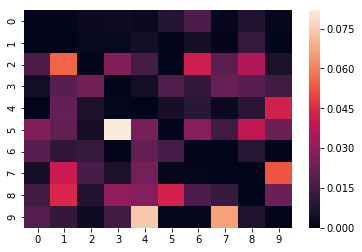

In [160]:
row_sum = conf_mx.sum(axis=1, keepdims=True)
nconf_mx = conf_mx/row_sum
np.fill_diagonal(nconf_mx,0)

sns.heatmap(nconf_mx)

So 9's are getting misclassified as 7's, 5's are getting misclassified as 3's and 8's as 1's.  Analyzing the confusion matrix can often tell you what's going right and wrong with your classification. It can also help to look at the individual mistakes. Let's get the index of training sets that contain 5's being misclassified as 3's:

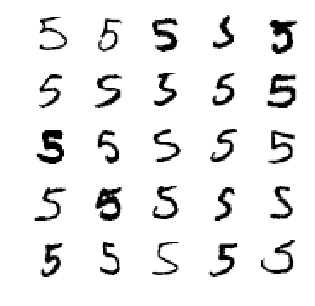

In [161]:
ft = (y_test == 5)&(y_predict == 3)

f, axes = plt.subplots(5,5,figsize=(5,5))
axes = axes.reshape(-1)

bads = X_test[ft][0:25]

for i in range(0,25):
    axes[i].imshow(bads[i].reshape(28,28),cmap="Greys")
    axes[i].axis('off')

Some of these seem like they should have been correctly classified, but some (like the top right corner) a human would have trouble classifying. That represents a sort of practical upper bound, there are many problems on which 100% accuracy is out of reach. 

# Problems:

### Problem 1: Gender Recognition by Voice

From the description file at https://data.world/ml-research/gender-recognition-by-voice:

In order to analyze gender by voice and speech, a training database was required. A database was built using thousands of samples of male and female voices, each labeled by their gender of male or female. Voice samples were collected from the following resources:

*  [The Harvard-Haskins Database of Regularly-Timed Speech](http://nsi.wegall.net/)
*  Telecommunications & Signal Processing Laboratory (TSP) Speech Database at McGill University
*  [VoxForge Speech Corpus](http://www.repository.voxforge1.org/downloads/SpeechCorpus/Trunk/Audio/Main/8kHz_16bit/)
*  [Festvox CMU_ARCTIC Speech Database at Carnegie Mellon University](http://festvox.org/cmu_arctic/dbs_awb.html)

Each voice sample is stored as a .WAV file, which is then pre-processed for acoustic analysis using the specan function from the WarbleR R package. Specan measures 22 acoustic parameters on acoustic signals for which the start and end times are provided.

The output from the pre-processed WAV files were saved into a CSV file, containing 3168 rows and 21 columns (20 columns for each feature and one label column for the classification of male or female). You can download the pre-processed dataset in CSV format, using the link above
Acoustic Properties Measured

The following acoustic properties of each voice are measured:

*    __duration:__ length of signal
*    __meanfreq:__ mean frequency (in kHz)
*    __sd:__ standard deviation of frequency
*    __median:__ median frequency (in kHz)
*    __Q25:__ first quantile (in kHz)
*    __Q75:__ third quantile (in kHz)
*    __IQR:__ interquantile range (in kHz)
*    __skew:__ skewness (see note in specprop description)
*    __kurt:__ kurtosis (see note in specprop description)
*    __sp.ent:__ spectral entropy
*    __sfm:__ spectral flatness
*    __mode:__ mode frequency
*    __centroid:__ frequency centroid (see specprop)
*    __peakf:__ peak frequency (frequency with highest energy)
*    __meanfun:__ average of fundamental frequency measured across acoustic signal
*    __minfun:__ minimum fundamental frequency measured across acoustic signal
*    __maxfun:__ maximum fundamental frequency measured across acoustic signal
*    __meandom:__ average of dominant frequency measured across acoustic signal
*    __mindom:__ minimum of dominant frequency measured across acoustic signal
*    __maxdom:__ maximum of dominant frequency measured across acoustic signal
*    __dfrange:__ range of dominant frequency measured across acoustic signal
*    __modindx:__ modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental frequencies divided by the frequency range

The gender of the speaker is given in the __label__ column. 

Note, the features for duration and peak frequency (peakf) were removed from training. Duration refers to the length of the recording, which for training, is cut off at 20 seconds. Peakf was omitted from calculation due to time and CPU constraints in calculating the value. In this case, all records will have the same value for duration (20) and peak frequency (0).

Load file using the code below. 

#### Question 1:

Which two features are most indicative of gendered voice?

#### Question 2:

Preform Linear Regression, Logistic Regression, and Quadratic Discriminant Analysis on the features, graphing the resulting fits. How does the two feature fit compare to the fit on all features?

In [175]:
import pandas as pd

data = pd.read_csv("https://raw.githubusercontent.com/tipthederiver/Math-7243-2020/master/Datasets/GenderedVoice/voice.csv")

data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


## Problem 2: MRI Data

The dementia level for the Oasis 1 MRI dataset is based on a patient assessment. As a result, it is not clear whether the levels of 0, .5, 1 and 2 should actually be understood as meaningfully numeric, or if they in fact are categorical labels. 

In this problem we want to treat them as categorical. However, we would also like to construct a slightly larger dataset, as we have seen that for images our 700 may not be sufficient. To construct a larger dataset we will again down sample the images, however this time we will use the down sampling to expand the dataset instead of throwing data away. After fixing a down sample rate $D$, we will construct one image out of the pixels $nD$, for $n = 1,2,\ldots, $. We will also construct $n D+i$, for $i = 1,\ldots, D$. This way, by down sampling with a rate $D$, we construct $D$ more pictures. 

__Note:__ It is very import that we perform the train test split _before_ we expand the dataset through down sampling. If not, we are effectively training on the test data. 

In [193]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib

file_dir = 'C:/PATH_TO_IMAGE_DIRECTORY/'
file_dir = 'C:/Users/Admin/Downloads/Student Data/MRILargeSlices/'

labels = pd.read_csv(file_dir + 'labels.csv')
display(labels)
y = labels.CDR

,Unnamed: 0,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay,Filename
0,0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN,OAS1_0001_MR1_mpr_n4_anon_111_t88_gfc_44.png
1,1,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN,OAS1_0001_MR1_mpr_n4_anon_111_t88_gfc_86.png
2,2,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN,OAS1_0001_MR1_mpr_n4_anon_111_t88_gfc_128.png
3,3,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN,OAS1_0002_MR1_mpr_n4_anon_111_t88_gfc_44.png
4,4,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN,OAS1_0002_MR1_mpr_n4_anon_111_t88_gfc_86.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,697,OAS1_0456_MR1,M,R,61,5.0,2.0,30.0,0.0,1637,0.780,1.072,NaN,OAS1_0456_MR1_mpr_n4_anon_111_t88_gfc_86.png
698,698,OAS1_0456_MR1,M,R,61,5.0,2.0,30.0,0.0,1637,0.780,1.072,NaN,OAS1_0456_MR1_mpr_n4_anon_111_t88_gfc_128.png
699,699,OAS1_0457_MR1,F,R,62,3.0,3.0,26.0,0.0,1372,0.766,1.279,NaN,OAS1_0457_MR1_mpr_n3_anon_111_t88_gfc_44.png
700,700,OAS1_0457_MR1,F,R,62,3.0,3.0,26.0,0.0,1372,0.766,1.279,NaN,OAS1_0457_MR1_mpr_n3_anon_111_t88_gfc_86.png


In [196]:
data = np.zeros([702, 36608])

for n, file_name in enumerate(labels.Filename):
    data[n,:] = np.mean(matplotlib.image.imread(file_dir + file_name),axis=2).reshape(-1)

    
    
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=0)
print(y_train.shape, y_test.shape)

(561,) (141,)


We want to sample the data array using the `data[start:stop:step]` slice paradigm. This means we are taking elements of the array `data` starting at `start`, ending at `stop` with step `step`. This is why previously `data[::DS]` down sampled at a rate of DS. For example, 

    lst = list(range(165)); lst[6::10]
    
returns

    [6, 16, 26, 36, 46, 56, 66, 76, 86, 96, 106, 116, 126, 136, 146, 156]

We need to create two new arrays, one of shape $[561\times DS, 36608/DS]$ containing the down sampled data, and one of shape $[561\times DS]$ containing the labels. The for each of the $N_{train}$ images in the training array, we need to create $DS$ new down sampled images, with the downsample starting from $i$:

`Xds_train[n+i, :] = X_train[i::DS]`

This will split our images into DS down sampled images. We then need to be sure to save out the appropriate label:

In [206]:
DS = 8             # Downsample rate, must be a multiple of 36608

N_train = y_train.shape[0]  # The length of the training data

if 36608/DS % 1 > 0:
    print("Downsample rate is not a multiple of 36608")
    DS = 1
    im_size = 36608
else:
    im_size = int(36608/DS)

Xds_train = np.zeros([N_train*DS, im_size])
yds_train = np.zeros([N_train*DS, im_size])
    
for n in range(N_train):
    for i in range(DS):
        Xds_train[n+i,:] = X_train[n,i::DS]
        yds_train[n+i] = y[n]
        
print(Xds_train.shape)

(4488, 4576)


### Question 1:

Based on the code above, downsample the test data in the same way. 

### Question 2:

Perform LDA, QDA, Logistic Regression and Categorical Linear Regression on the down sampled Oasis 1 dataset. How do these compare to linear regression?